Python code se estructura en modules y scripts. Este notebook es un script que usa modules escrito por otros y distribuido open source. Igual se puede escribir tus propios modules, usarlos en tu code y distribuir. Aqui empezamos a import modules:

In [1]:
from picamera import PiCamera
import RPi.GPIO as GPIO
from time import sleep
import time
import matplotlib.pyplot as plt

Here is the rest of the code split up into blocks. Should add nice explanations and plotting images inline with matplotlib. Here is an equation $\nabla^2 u = 0$ just because I can.

Set up the output pins of the Raspberry pi to operate the light switch:

In [2]:
GPIO.setmode(GPIO.BOARD)
GPIO.setup(29, GPIO.OUT)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  from ipykernel import kernelapp as app


Create a camera object that will do the imaging:

In [3]:
camera = PiCamera()

Set some values for where things go and how often we take images:

In [4]:
folder = ""
filename = "exptest291116"
interval = 3
steps = 3

Here we set the camera mode, we are trying to get constant (or at least known) exposure and gain:

In [5]:
#camera settings
camera.awb_mode = 'off'
camera.awb_gain = 1
#camera.analog_gain = 1

#camera.brightness = 60
#camera.sharpness = 0
#camera.contrast = 0
#camera.saturation = 0
camera.exposure_mode = 'fixedfps'

camera.framerate = 1
camera.shutter_speed = 10000

Lets take an image to test things:

In [6]:
img = camera.capture('test.jpg')

Here draw the image in the notebook:

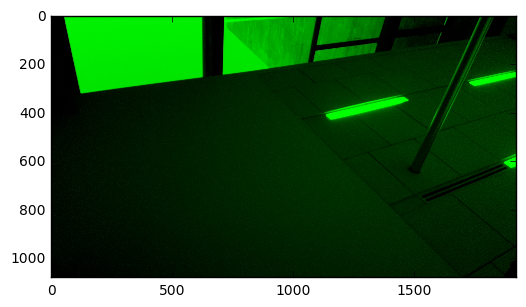

In [8]:
img = plt.imread('test.jpg')
plt.interactive(False)
plt.imshow(img)

Make a loop, switch on light, take image, switch off light etc.:

In [ ]:
for i in range(steps):
    t1 = time.time()
    sleep(interval)

    fname0 = folder + filename + "_BG_%04d.jpg"%(i)

    camera.capture(fname0)

    GPIO.output(29,GPIO.HIGH)
    sleep(1)

    fname = folder + filename + "_%04d.jpg"%(i)
    camera.capture(fname)

    print camera.exposure_speed

    GPIO.output(29,GPIO.LOW)

    elapsed = time.time()-t1
    print elapsed


GPIO.cleanup()